python pendulum.ipynb

Simple code to read time and angle from a rotary encoder as sent through an Arduino.

* v1.0 August 2018, R. Knobel
* v1.1 Sept 2019, R. Knobel and S. Gillen:  Changed time.clock() to time.perf_counter(), and removed time.sleep for improved performance.

In [1]:
import time
from serial import Serial
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as find_peaks
%matplotlib inline

Change 'com4' below to the com port chosen by Windows to connect to the Arduino.  It can be found in Device Manager, or the Arduino IDE.

In [37]:
ArduinoSerial = Serial('/dev/cu.usbmodem11101',38400)

In [38]:
print(ArduinoSerial)

Serial<id=0x11ab94f40, open=True>(port='/dev/cu.usbmodem11101', baudrate=38400, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False)


In [39]:
#time.sleep(3)
#ArduinoSerial.readline()

Change the variable below to collect for more or less time, set in seconds.

In [40]:
collect_time = 40

In [41]:
ArduinoSerial.write(b's')
start= time.perf_counter()
t=start
i=0
#print ('initially:',t-start)
times=[]
angles=[]
mystrings = []

while ((ArduinoSerial.in_waiting > 0) or (t-start < collect_time)):
    c = ArduinoSerial.readline()[:-2]
    #print(c)
    a,ti = np.fromstring(c, count=2, sep=',')
#    print(a,ti)
    times = np.append(times,ti*1e-6)
    angles = np.append(angles,a)
#    time.sleep(.02)
    t = time.perf_counter()
#    print(t-start)
    if ((t-start > collect_time) and (i==0)):
        ArduinoSerial.write(b'q')
        i=1
ArduinoSerial.close()

In [42]:
# print(ArduinoSerial.in_waiting)  #check everything is closed - this should give an error.

In [43]:
ArduinoSerial.close() #check everything is closed 

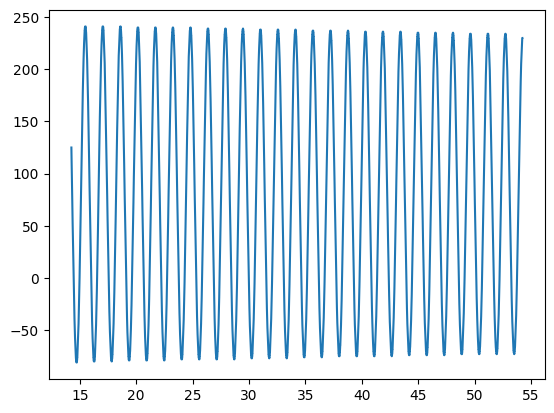

In [44]:
plt.plot(times,angles)

In [45]:
np.savetxt('collect_time_40.csv',np.transpose([times,angles]),delimiter=',')